In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from warnings import filterwarnings
filterwarnings("ignore")
sns.set(color_codes=True)
import scipy.stats as stats

### Problem 1

Wholesale Customers Analysis (Download Data)

 Problem Statement:

A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail).

In [2]:
customer = pd.read_csv('Wholesale Customer.csv')

In [3]:
customer.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [4]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


# 1.1.1 Use methods of descriptive statistics to summarize data.

In [5]:
customer.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Buyer/Spender,440.0,NaN,NaN,NaN,220.5,127.161315,1.0,110.75,220.5,330.25,440.0
Channel,440,2,Hotel,298,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,440,3,Other,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fresh,440.0,NaN,NaN,NaN,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,NaN,NaN,NaN,5796.265909,7380.377175,55.0,1533.0,3627.0,7190.25,73498.0
Grocery,440.0,NaN,NaN,NaN,7951.277273,9503.162829,3.0,2153.0,4755.5,10655.75,92780.0
Frozen,440.0,NaN,NaN,NaN,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,NaN,NaN,NaN,2881.493182,4767.854448,3.0,256.75,816.5,3922.0,40827.0
Delicatessen,440.0,NaN,NaN,NaN,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [6]:
customer.isnull().sum()

Buyer/Spender       0
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

# 1.1.2 Which Region and which Channel spent the most?

In [7]:
pd.DataFrame(round(customer['Region'].value_counts(normalize=True).sort_values(ascending=False)*100,2)).head(1)

,Region
Other,71.82


In [8]:
pd.DataFrame(round(customer['Channel'].value_counts(normalize=True).sort_values(ascending=False)*100,2)).head(1)

,Channel
Hotel,67.73


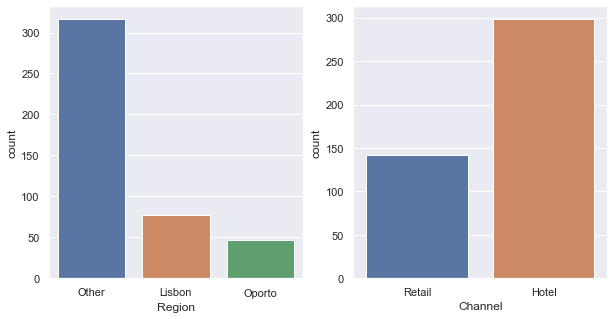

In [9]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(customer['Region']);

plt.subplot(1,2,2)
sns.countplot(customer['Channel']);

plt.show()

# 1.1.3 Which Region and which Channel spent the least?

In [10]:
pd.DataFrame(round(customer['Region'].value_counts(normalize=True).sort_values(ascending=True)*100,2)).head(1)

,Region
Oporto,10.68


In [11]:
pd.DataFrame(round(customer['Channel'].value_counts(normalize=True).sort_values(ascending=True)*100,2)).head(1)

,Channel
Retail,32.27


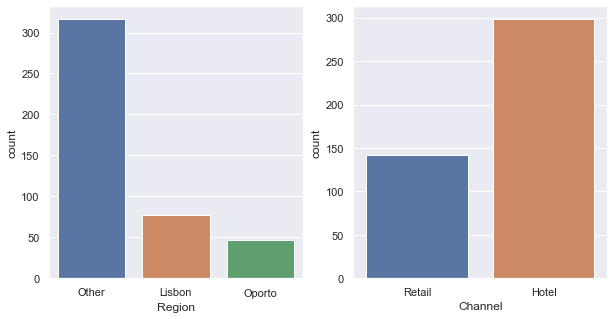

In [12]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(customer['Region']);

plt.subplot(1,2,2)
sns.countplot(customer['Channel']);

plt.show()

# 1.2. There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer.

In [13]:
customer1 = customer

In [14]:
customer1['Total'] = customer1.iloc[:,3:].sum(axis=1)
customer1.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100


In [15]:
df1 = pd.pivot_table(data=customer1,values=customer1.iloc[:,3:],index='Region')

In [16]:
df1

,Delicatessen,Detergents_Paper,Fresh,Frozen,Grocery,Milk,Total
Region,,,,,,,
Lisbon,1354.896104,2651.116883,11101.727273,3000.337662,7403.077922,5486.415584,30997.571429
Oporto,1159.702128,3687.468085,9887.680851,4045.361702,9218.595745,5088.170213,33086.978723
Other,1620.601266,2817.753165,12533.471519,2944.594937,7896.363924,5977.085443,33789.870253


In [17]:
df_region = customer1.groupby('Region').sum()
df_region = df_region.drop(columns='Total')
df_region

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Region,,,,,,,
Lisbon,18095,854833,422454,570037,231026,204136,104327
Oporto,14899,464721,239144,433274,190132,173311,54506
Other,64026,3960577,1888759,2495251,930492,890410,512110


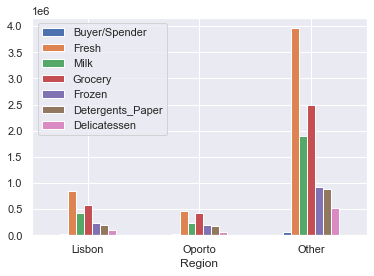

In [18]:
df_region.plot.bar(rot=0);

In [19]:
df2 = pd.pivot_table(data=customer1,values=customer1.iloc[:,3:],index='Channel')

In [20]:
df2

,Delicatessen,Detergents_Paper,Fresh,Frozen,Grocery,Milk,Total
Channel,,,,,,,
Hotel,1415.956376,790.560403,13475.560403,3748.251678,3962.137584,3451.724832,26844.191275
Retail,1753.436620,7269.507042,8904.323944,1652.612676,16322.852113,10716.500000,46619.232394


In [21]:
df_channel = customer1.groupby('Channel').sum()
df_channel = df_channel.drop(columns='Total')
df_channel

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Channel,,,,,,,
Hotel,71034,4015717,1028614,1180717,1116979,235587,421955
Retail,25986,1264414,1521743,2317845,234671,1032270,248988


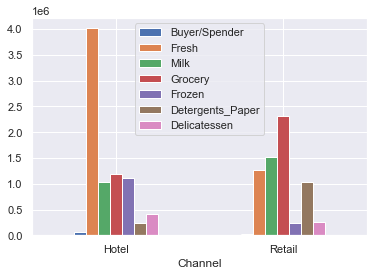

In [22]:
df_channel.plot.bar(rot=0);

# 1.3 On the basis of the descriptive measure of variability, which item shows the most inconsistent behaviour? Which items shows the least inconsistent behaviour?

In [23]:
customer.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100


In [24]:
pd.DataFrame(customer.iloc[:,3:].var(),columns=['Values']).sort_values('Values',ascending=True)

,Values
Delicatessen,7.952997e+06
Detergents_Paper,2.273244e+07
Frozen,2.356785e+07
Milk,5.446997e+07
Grocery,9.031010e+07
Fresh,1.599549e+08
Total,6.946546e+08


### we can observe that 'Delicatessen' item has the most inconsistent which is nothing but high variations and 'Fresh' item has the least inconsistent which is nothing but low variations

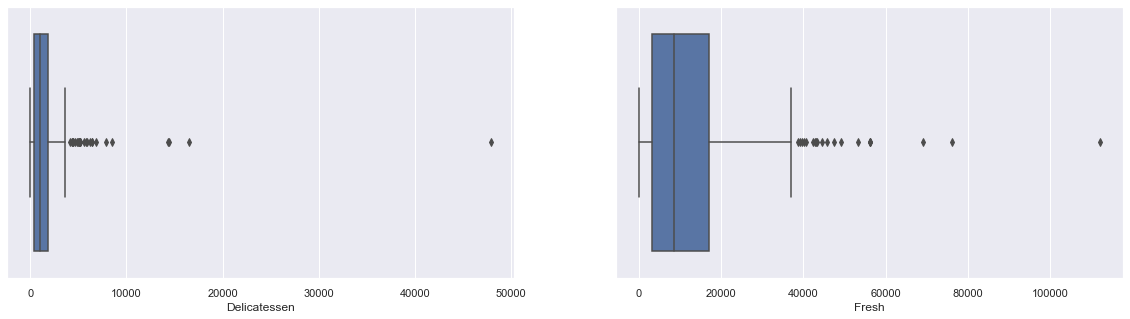

In [25]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(customer['Delicatessen']);

plt.subplot(1,2,2)
sns.boxplot(customer['Fresh']);

plt.show()

# 1.4 Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.

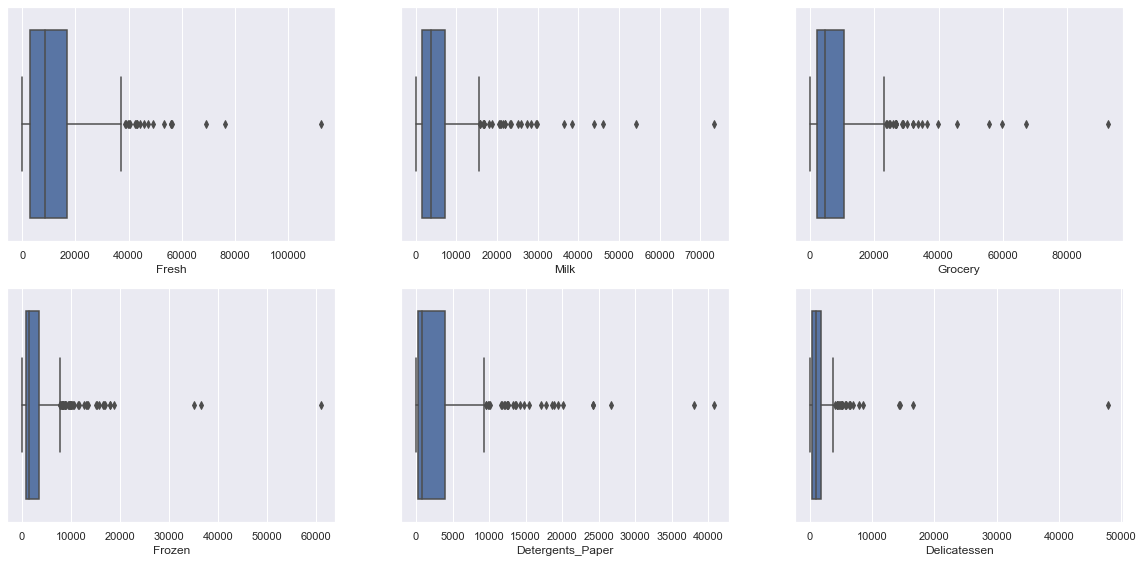

In [26]:
plt.figure(figsize=(20,25))
plt.subplot(5,3,1)
sns.boxplot(customer['Fresh']);

plt.subplot(5,3,2)
sns.boxplot(customer['Milk']);

plt.subplot(5,3,3)
sns.boxplot(customer['Grocery']);

plt.subplot(5,3,4)
sns.boxplot(customer['Frozen']);

plt.subplot(5,3,5)
sns.boxplot(customer['Detergents_Paper']);

plt.subplot(5,3,6)
sns.boxplot(customer['Delicatessen']);

plt.show()

# 1.5 On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective.

### Problem 2 - (Download Data)

The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates (stored in the Survey data set).

In [27]:
survey = pd.read_csv('Survey-1.csv')

In [28]:
survey.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [29]:
survey.isnull().sum()

ID                   0
Gender               0
Age                  0
Class                0
Major                0
Grad Intention       0
GPA                  0
Employment           0
Salary               0
Social Networking    0
Satisfaction         0
Spending             0
Computer             0
Text Messages        0
dtype: int64

In [30]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


In [31]:
survey.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,62.0,NaN,NaN,NaN,31.5,18.041619,1.0,16.25,31.5,46.75,62.0
Gender,62,2,Female,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,62.0,NaN,NaN,NaN,21.129032,1.431311,18.0,20.0,21.0,22.0,26.0
Class,62,3,Senior,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Major,62,8,Retailing/Marketing,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Grad Intention,62,3,Yes,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GPA,62.0,NaN,NaN,NaN,3.129032,0.377388,2.3,2.9,3.15,3.4,3.9
Employment,62,3,Part-Time,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,62.0,NaN,NaN,NaN,48.548387,12.080912,25.0,40.0,50.0,55.0,80.0
Social Networking,62.0,NaN,NaN,NaN,1.516129,0.844305,0.0,1.0,1.0,2.0,4.0


# 2.1. For this data, construct the following contingency tables (Keep Gender as row variable)
# 2.1.1. Gender and Major

In [32]:
df1 = pd.DataFrame(pd.crosstab(index=survey['Gender'],columns=survey['Major'],margins=True))

In [33]:
df1

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


# 2.1.2. Gender and Grad Intention

In [34]:
df2 = pd.DataFrame(pd.crosstab(index=survey['Gender'],columns=survey['Grad Intention'],margins=True))

In [35]:
df2

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


# 2.1.3. Gender and Employment

In [36]:
df3 = pd.DataFrame(pd.crosstab(index=survey['Gender'],columns=survey['Employment'],margins=True))

In [37]:
df3

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


# 2.1.4. Gender and Computer

In [38]:
df4 = pd.DataFrame(pd.crosstab(index=survey['Gender'],columns=survey['Computer'],margins=True))

In [39]:
df4

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


# 2.2. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

# 2.2.1 What is the probability that a randomly selected CMSU student will be male?

In [40]:
#Gender and Major
print('P(Male) = ',29/62)
#Gender and Grad Intention
print('P(Male) = ',29/62)
#Gender and Employment
print('P(Male) = ',29/62)
#Gender and Computer
print('P(Male) = ',29/62)

P(Male) =  0.46774193548387094
P(Male) =  0.46774193548387094
P(Male) =  0.46774193548387094
P(Male) =  0.46774193548387094


# 2.2.2 What is the probability that a randomly selected CMSU student will be female?

In [41]:
#Gender and Major
print('P(Female) = ',33/62)
#Gender and Grad Intention
print('P(Female) = ',33/62)
#Gender and Employment
print('P(Female) = ',33/62)
#Gender and Computer
print('P(Female) = ',33/62)

P(Female) =  0.532258064516129
P(Female) =  0.532258064516129
P(Female) =  0.532258064516129
P(Female) =  0.532258064516129


# 2.3. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:
# 2.3.1 Find the conditional probability of different majors among the male students in CMSU.

In [42]:
df1_contigency = pd.DataFrame(pd.crosstab(index=survey['Gender'],columns=survey['Major'],margins=True,normalize='index'))
df1_contigency

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,0.090909,0.090909,0.212121,0.121212,0.121212,0.090909,0.272727,0.000000
Male,0.137931,0.034483,0.137931,0.068966,0.206897,0.137931,0.172414,0.103448
All,0.112903,0.064516,0.177419,0.096774,0.161290,0.112903,0.225806,0.048387


In [43]:
# Gender Male and different Major
# Accounting Major
print('P(Male[Accounting]) = ',4/29)
# CIS Major
print('P(Male[CIS]) = ',1/29)
# Economics/Finance Major
print('P(Male[Economics/Finance]) = ',4/29)
# International Business Major
print('P(Male[International Business]) = ',2/29)
# Management Major
print('P(Male[Management]) = ',6/29)
# Other Major
print('P(Male[Other]) = ',4/29)
# Retailing/Marketing Major
print('P(Male[Retailing/Marketing]) = ',5/29)
# Undecided Major
print('P(Male[Undecided]) = ',3/29)

P(Male[Accounting]) =  0.13793103448275862
P(Male[CIS]) =  0.034482758620689655
P(Male[Economics/Finance]) =  0.13793103448275862
P(Male[International Business]) =  0.06896551724137931
P(Male[Management]) =  0.20689655172413793
P(Male[Other]) =  0.13793103448275862
P(Male[Retailing/Marketing]) =  0.1724137931034483
P(Male[Undecided]) =  0.10344827586206896


# 2.2.2 What is the probability that a randomly selected CMSU student will be female?

In [44]:
df1_contigency

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,0.090909,0.090909,0.212121,0.121212,0.121212,0.090909,0.272727,0.000000
Male,0.137931,0.034483,0.137931,0.068966,0.206897,0.137931,0.172414,0.103448
All,0.112903,0.064516,0.177419,0.096774,0.161290,0.112903,0.225806,0.048387


In [45]:
# Gender Female and different Major
# Accounting Major
print('P(Female[Accounting]) = ',3/33)
# CIS Major
print('P(Female[CIS]) = ',3/33)
# Economics/Finance Major
print('P(Female[Economics/Finance]) = ',7/33)
# International Business Major
print('P(Female[International Business]) = ',4/33)
# Management Major
print('P(Female[Management]) = ',4/33)
# Other Major
print('P(Female[Other]) = ',3/33)
# Retailing/Marketing Major
print('P(Female[Retailing/Marketing]) = ',9/33)
# Undecided Major
print('P(Female[Undecided]) = ',0/33)

P(Female[Accounting]) =  0.09090909090909091
P(Female[CIS]) =  0.09090909090909091
P(Female[Economics/Finance]) =  0.21212121212121213
P(Female[International Business]) =  0.12121212121212122
P(Female[Management]) =  0.12121212121212122
P(Female[Other]) =  0.09090909090909091
P(Female[Retailing/Marketing]) =  0.2727272727272727
P(Female[Undecided]) =  0.0


# 2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:
# 2.4.1 Find the probability That a randomly chosen student is a male and intends to graduate.

In [46]:
df2

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


In [47]:
print('p[Male] =',17/29)

p[Male] = 0.5862068965517241


# 2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop.

In [48]:
df4

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


In [49]:
print('p(Female and doesnot have laptop) =',4/33)

p(Female and doesnot have laptop) = 0.12121212121212122


# 2.5. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:
# 2.5.1 Find the probability that a randomly chosen student is a male or has a full-time employment

In [50]:
df3

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


In [51]:
print('p(Male|Fulltimeemp) =',((29/62)+(10/62)-(7/62))*100,'%')

p(Male|Fulltimeemp) = 51.61290322580645 %


# 2.5.2 Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

In [52]:
df1

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


In [53]:
print('p(international business or management|Female) =',((8/33))*100,'%')

p(international business or management|Female) = 24.242424242424242 %


# 2.6 Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think graduate intention and being female are independent events?

In [54]:
survey1 = survey[survey['Grad Intention'] != 'Undecided']
survey_cont = pd.DataFrame(pd.crosstab(index=survey1['Gender'],columns=survey1['Grad Intention'],margins=True))

In [55]:
survey_cont

Grad Intention,No,Yes,All
Gender,,,
Female,9,11,20
Male,3,17,20
All,12,28,40


In [56]:
survey_cont1 = pd.DataFrame(pd.crosstab(index=survey1['Gender'],columns=survey1['Grad Intention'],margins=True,normalize='index'))
survey_cont1

Grad Intention,No,Yes
Gender,,
Female,0.45,0.55
Male,0.15,0.85
All,0.30,0.70


# 2.7 Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending and Text Messages. Answer the following questions based on the data
# 2.7.1 If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

In [57]:
survey.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [58]:
pd.crosstab(index=survey['Gender'],columns=survey['GPA'],margins=True)

GPA,2.3,2.4,2.5,2.6,2.8,2.9,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,All
Gender,,,,,,,,,,,,,,,,,
Female,1,1,2,0,1,3,5,2,4,3,2,4,1,2,1,1,33
Male,0,0,4,2,2,1,2,5,2,2,5,2,2,0,0,0,29
All,1,1,6,2,3,4,7,7,6,5,7,6,3,2,1,1,62


In [59]:
print('p(his/her GPA less than 3) =',(survey['GPA']<3).sum()/62)

p(his/her GPA less than 3) = 0.27419354838709675


# 2.7.2 Find conditional probability that a randomly selected male earns 50 or more. Find conditional probability that a randomly selected female earns 50 or more.

In [60]:
pd.crosstab(index=survey['Gender'],columns=survey['Salary'],margins=True)

Salary,25.0,30.0,35.0,37.0,37.5,40.0,42.0,45.0,47.0,47.5,50.0,52.0,54.0,55.0,60.0,65.0,70.0,78.0,80.0,All
Gender,,,,,,,,,,,,,,,,,,,,
Female,0,5,1,0,1,5,1,1,0,1,5,0,0,5,5,0,1,1,1,33
Male,1,0,1,1,0,7,0,4,1,0,4,1,1,3,3,1,0,0,1,29
All,1,5,2,1,1,12,1,5,1,1,9,1,1,8,8,1,1,1,2,62


In [61]:
pd.crosstab(index=survey['Gender']=='Male',columns=survey['Salary']>=50,margins=True,normalize='index')

Salary,False,True
Gender,,
False,0.454545,0.545455
True,0.517241,0.482759
All,0.483871,0.516129


In [62]:
print('p(male earns >= 50) =',((survey['Gender']=='Male')&(survey['Salary']>=50)).sum()/29)

p(male earns >= 50) = 0.4827586206896552


In [63]:
pd.crosstab(index=survey['Gender']=='Female',columns=survey['Salary']>=50,margins=True,normalize='index')

Salary,False,True
Gender,,
False,0.517241,0.482759
True,0.454545,0.545455
All,0.483871,0.516129


In [64]:
print('p(Female earns >= 50) =',((survey['Gender']=='Female')&(survey['Salary']>=50)).sum()/33)

p(Female earns >= 50) = 0.5454545454545454


# 2.8.1 Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending and Text Messages. For each of them comment whether they follow a normal distribution.

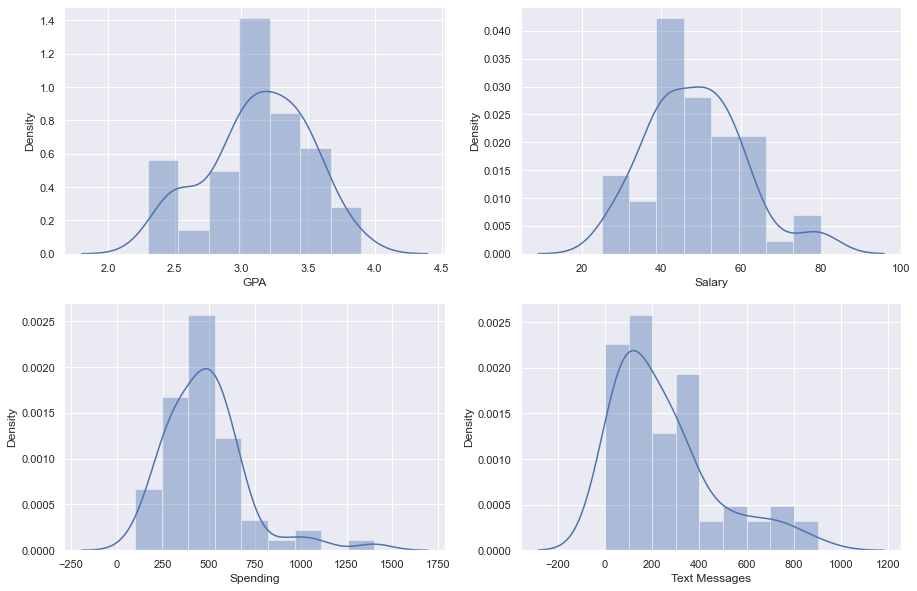

In [65]:
plt.figure(figsize=(15,10));

plt.subplot(2,2,1);
sns.distplot(survey['GPA']);
plt.subplot(2,2,2);
sns.distplot(survey['Salary']);
plt.subplot(2,2,3);
sns.distplot(survey['Spending']);
plt.subplot(2,2,4);
sns.distplot(survey['Text Messages']);

### Problem 3 (Download Data)

An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging.   In some cases, excessive moisture can cause the granules attached to the shingles for texture and coloring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet are calculated. The company would like to show that the mean moisture content is less than 0.35 pounds per 100 square feet.

The file (A & B shingles.csv) includes 36 measurements (in pounds per 100 square feet) for A shingles and 31 for B shingles.

# 3.1 Do you think there is evidence that means moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

In [66]:
from scipy.stats import ttest_1samp, ttest_ind

In [67]:
shingles = pd.read_csv('A & B shingles-1.csv')

In [68]:
shingles.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [69]:
shingles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       36 non-null     float64
 1   B       31 non-null     float64
dtypes: float64(2)
memory usage: 704.0 bytes


In [70]:
shingles.shape

(36, 2)

In [71]:
shingles.isnull().sum()

A    0
B    5
dtype: int64

In [72]:
shingles.describe().T

,count,mean,std,min,25%,50%,75%,max
A,36.0,0.316667,0.135731,0.13,0.2075,0.29,0.3925,0.72
B,31.0,0.273548,0.137296,0.10,0.1600,0.23,0.4000,0.58


## For sample A

### step1 : Define null and alternative hypothesis

### step2 : Decide the significance level

In [73]:
alpha = 0.05

### step3 : identify the test statistic

In [74]:
shingles['A'].describe()

count    36.000000
mean      0.316667
std       0.135731
min       0.130000
25%       0.207500
50%       0.290000
75%       0.392500
max       0.720000
Name: A, dtype: float64

In [75]:
n = shingles['A'].size

### step4 : calculate t_statistic and p_value

In [76]:
t_statistic, p_value = ttest_1samp(shingles['A'],0.35,nan_policy='omit')
print('t_statistic :',t_statistic)
print('p_value :',p_value)

t_statistic : -1.4735046253382782
p_value : 0.14955266289815025


### step5 : Decide to reject or accept null hypothesis

In [77]:
print(p_value)
if p_value < alpha:
    print('we reject null hypothesis')
    print('we conclude that moisture content is less than permissible limit in sample A')
else :
    print("we fail to reject null hypothesis")
    print("we conclude that moisture content is greater than permissible limit in sample A")

0.14955266289815025
we fail to reject null hypothesis
we conclude that moisture content is greater than permissible limit in sample A


## For sample B

### step1 : Define null and alternative hypothesis

### step2 : Decide the significance level

In [78]:
alpha = 0.05

### step3 : identify the test statistic

In [79]:
shingles['B'].describe()

count    31.000000
mean      0.273548
std       0.137296
min       0.100000
25%       0.160000
50%       0.230000
75%       0.400000
max       0.580000
Name: B, dtype: float64

### step4 : calculate t_statistic and p_value

In [80]:
t_statistic, p_value = ttest_1samp(shingles['B'],0.35,nan_policy='omit')
print('t_statistic :',t_statistic)
print('p_value :',p_value)

t_statistic : -3.1003313069986995
p_value : 0.004180954800638365


### step5 : Decide to reject or accept null hypothesis

In [81]:
print(p_value)
if p_value < alpha:
    print('we reject null hypothesis')
    print('we conclude that moisture content is less than permissible limit in sample B')
else :
    print("we fail to reject null hypothesis")
    print("we conclude that moisture content is greater than permissible limit in sample B")

0.004180954800638365
we reject null hypothesis
we conclude that moisture content is less than permissible limit in sample B


#### From the above tests for sample A and B, we can observe that for sample B has enough evidence to reject null hypothesis and hence we conclude that moisture content is less than the permissible limit in sample B

# 3.2 Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

### step1 : Define null and alternative hypothesis

### step2 : Decide the significance level

In [82]:
alpha = 0.05

### step3 : identify the test statistic

In [83]:
shingles.describe().T

,count,mean,std,min,25%,50%,75%,max
A,36.0,0.316667,0.135731,0.13,0.2075,0.29,0.3925,0.72
B,31.0,0.273548,0.137296,0.10,0.1600,0.23,0.4000,0.58


### step4 : calculate t_statistic and p_value

In [84]:
t_statistic, p_value = ttest_ind(shingles['A'],shingles['B'],nan_policy='omit')
print('t_statistic :',t_statistic)
print('p_value :',p_value)

t_statistic : 1.2896282719661123
p_value : 0.2017496571835306


### step5 : Decide to reject or accept null hypothesis

In [85]:
print(p_value)
if p_value < alpha:
    print('we reject null hypothesis')
    print('we conclude that population means are same')
else :
    print("we fail to reject null hypothesis")
    print("we conclude that population means are not same")

0.2017496571835306
we fail to reject null hypothesis
we conclude that population means are not same
